## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [128]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [129]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
bitstamp_csv_path = Path('./Resources/bitstamp.csv')
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    bitstamp_csv_path,
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [130]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
2018-01-01 00:05:00,13620.00,13634.15,13610.00,$13610.0,4.716162,64226.303028,13618.341726
2018-01-01 00:06:00,13610.00,13650.18,13590.42,$13600.56,26.432759,360108.155630,13623.555198
2018-01-01 00:07:00,13593.99,13595.41,13566.93,$13580.0,10.674241,144961.611180,13580.507983
2018-01-01 00:08:00,13580.00,13580.00,13547.59,$13579.0,19.322370,261942.833550,13556.454543


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [131]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
coinbase_csv_path = Path('./Resources/coinbase.csv')
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    coinbase_csv_path,
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

In [132]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [133]:
# ~~~ COUNT THE NUMBER OF NaN VALUES IN THE DATAFRAME ~~~
#   ... cause, why not?
bitstamp_df.isna().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [134]:
print(f"Original Dataset: {bitstamp_df.loc[:,'Close'].count():3,}") # checking the original size of the dataframe

Original Dataset: 129,540


In [135]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.dropna(inplace=True)
print(f"New Dataset: {bitstamp_df.loc[:,'Close'].count():3,}") # check the new size of the dataframe

New Dataset: 129,067


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [136]:
'''
# IMPORTANT REMINDER FOR THE BELOW:
# if you don't clarify ~~~well enough~~~ the output variable of the command (i.e. the left-hand side of the assignment operator),
# you'll end up attempting to assign to ~~~the entire dataframe~~~ the altered data from ~~~a single series~~~ w/n the dataframe.
# ergo, I need to pay attention more to, i.e. internalize, the vital nature of identifying the ~~~location~~~ in a ~~~location function~~~ (i.e. '.loc')
'''
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].str.replace('$','')

ipykernel_launcher:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


### Step 3: Convert the data type of the Close column to a `float`.

In [137]:
# Convert the Close data type to a float
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].astype('float')
bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [138]:
# Review the data for duplicate values, and drop them if necessary
'''
there are no duplicated values, but at the same time since this is a
~time~ series there is not much cause for concern of duplicate values;
only issue I can think up is if there were to somehow be duplicate indexes.
'''
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [139]:
# Repeat Steps 1–4 for the coinbase DataFrame
'''
1) replace or drop all Nan values
2) replace $ if needed
3) convert data types if needed
4) review for duplicated values and drop if needed
'''
#print(f"Original Size: {coinbase_df.loc[:,'Close'].count():3,}\nCount of NaN Values:\n{coinbase_df.isna().sum()}")

# 1) drop all NaN
coinbase_df.dropna(inplace=True)
#print(f"Post-Drop Size: {coinbase_df.loc[:,'Close'].count():3,}")

# 2) replace $
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].str.replace('$','')
#coinbase_df.dtypes

# 3) convert close column datatype
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].astype('float')
#coinbase_df.dtypes

# again, same as bitstamp_df: no duplicated values, but it still also
# wouldn't matter for these numerical values if they even happened to end up being a 'duplicate'
# coinbase_df.duplicated().sum()

ipykernel_launcher:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [140]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [141]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:,'Close']
# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [142]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [143]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BITSTAMP: BTC Close'}, xlabel='Timestamp'>

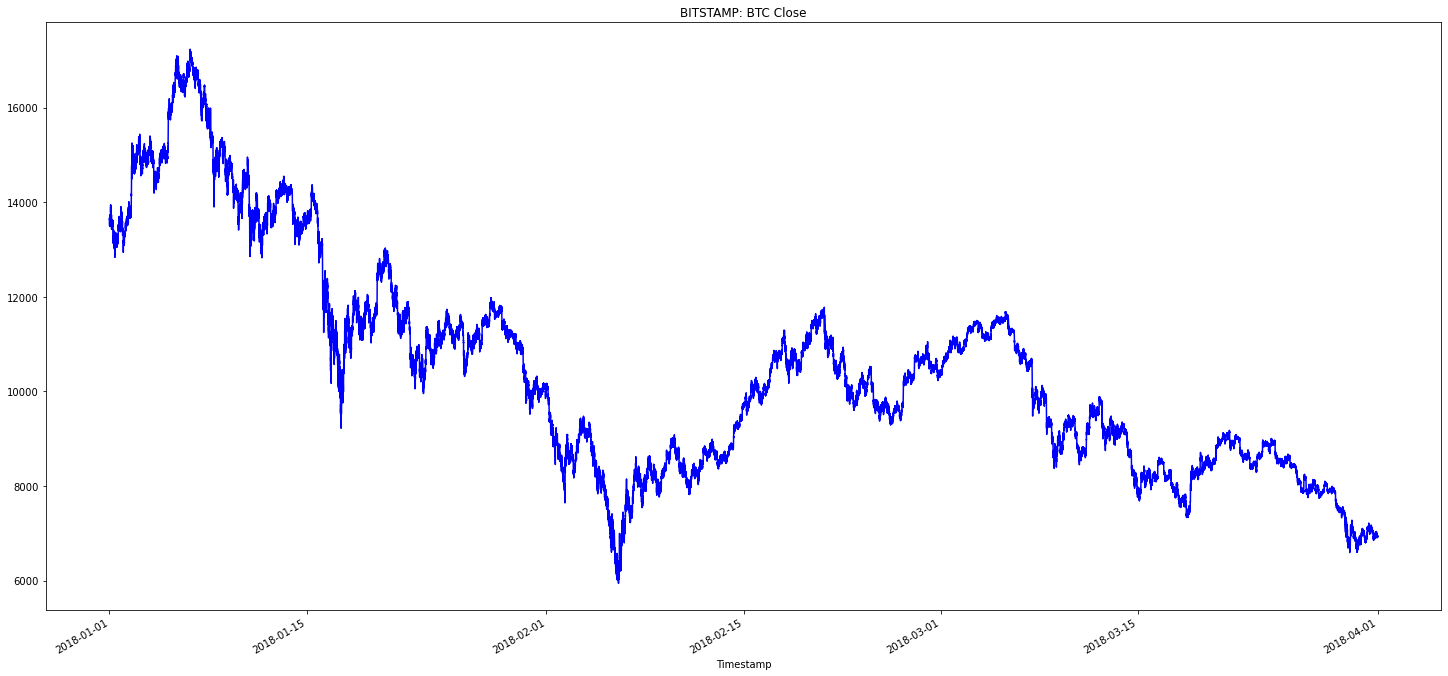

In [144]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(25,12),title='BITSTAMP: BTC Close',color='blue')

<AxesSubplot:title={'center':'COINBASE: BTC Close'}, xlabel='Timestamp'>

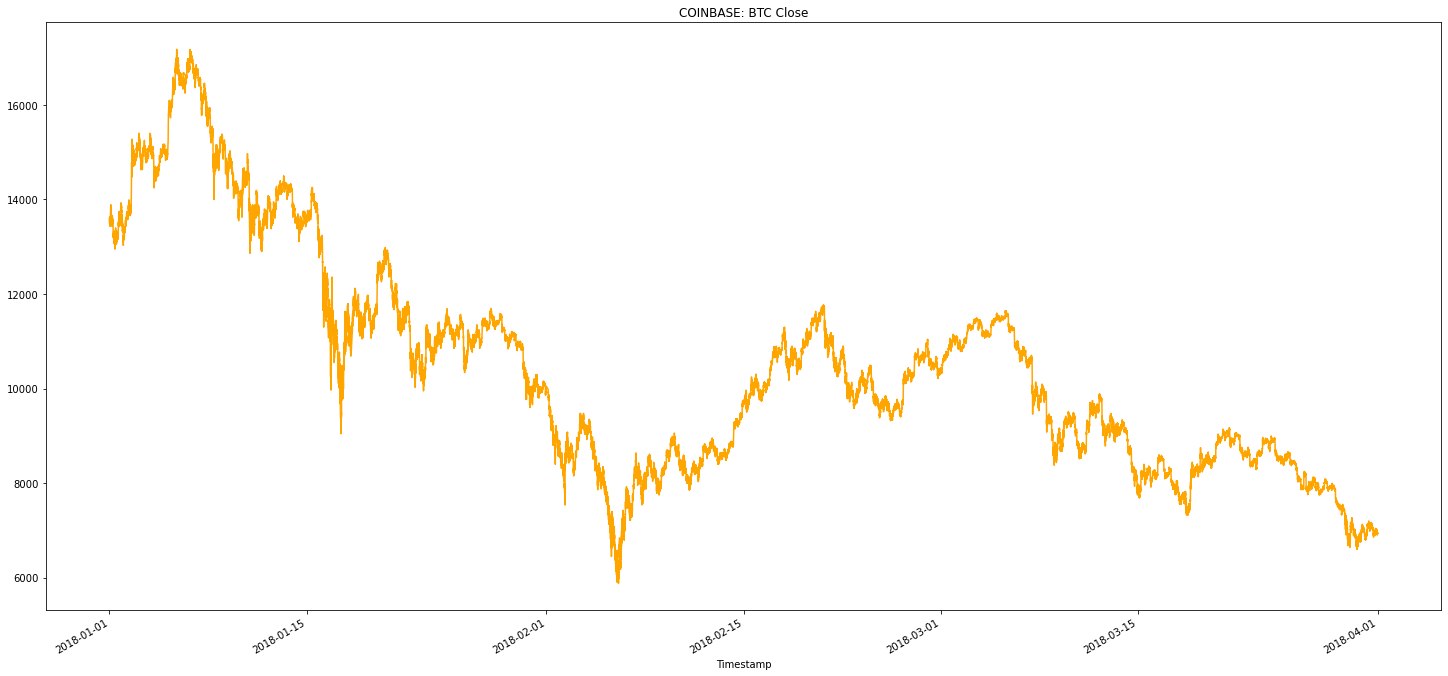

In [145]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(25,12),title='COINBASE: BTC Close',color='orange')

<AxesSubplot:title={'center':'BTC Close: BITSTAMP / COINBASE'}, xlabel='Timestamp'>

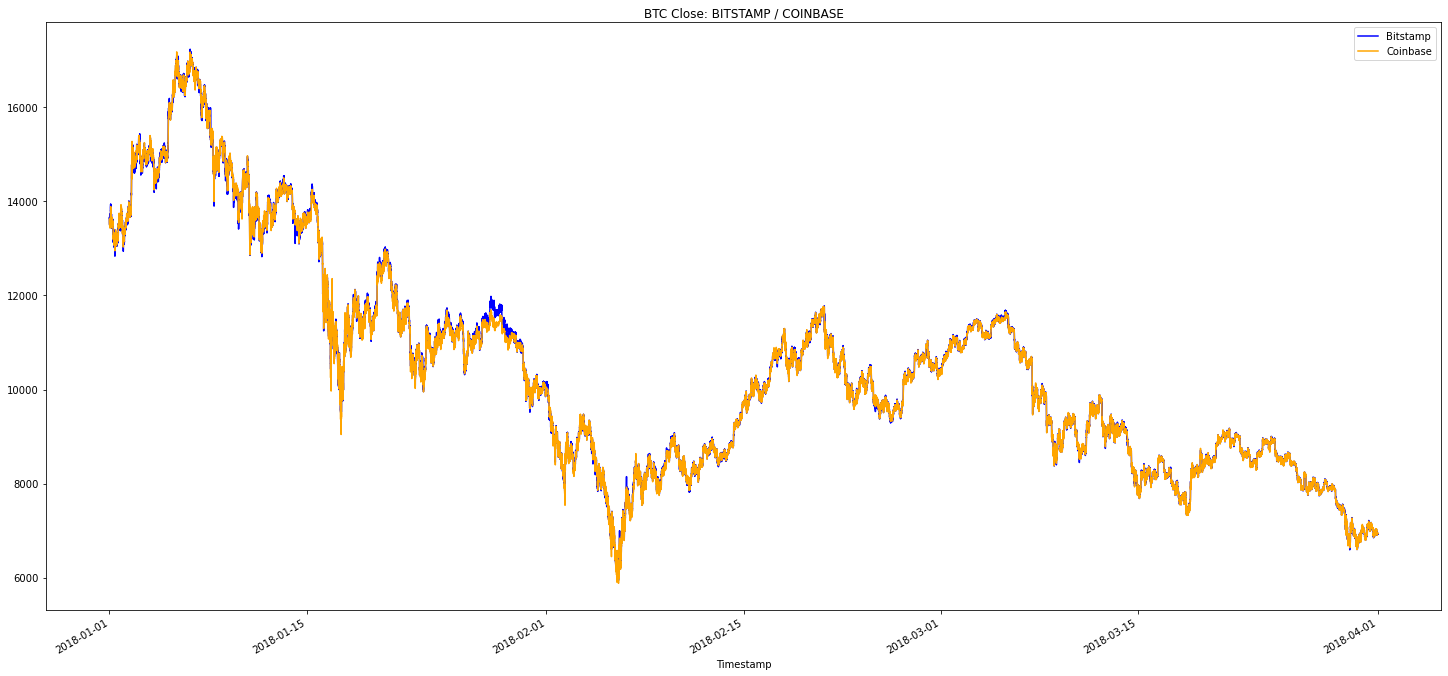

In [146]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True,figsize=(25,12),title='BTC Close: BITSTAMP / COINBASE',color='blue',label='Bitstamp')
coinbase_sliced.plot(legend=True,figsize=(25,12),color='orange',label='Coinbase')

<AxesSubplot:title={'center':'BTC Close Comparison: BITSTAMP / COINBASE -- Jan. 1 to Feb. 1, 2018'}, xlabel='Timestamp'>

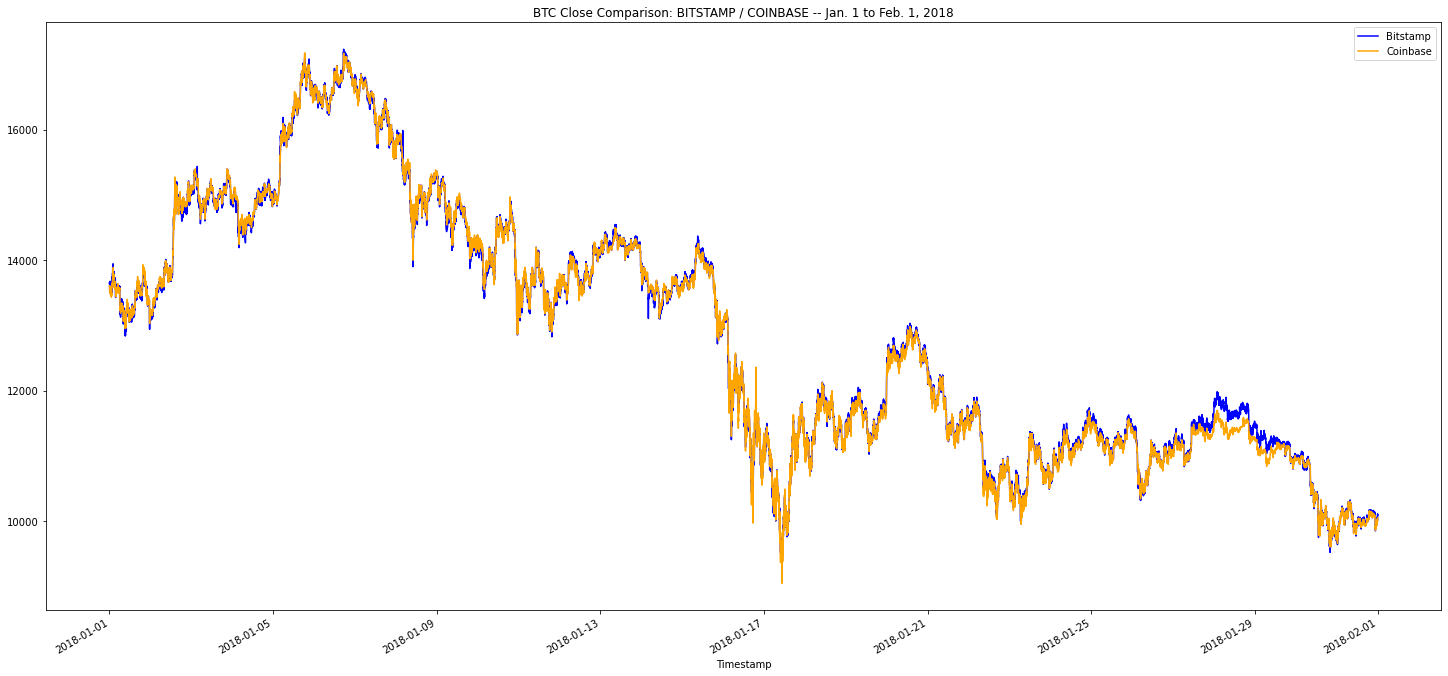

In [147]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True,figsize=(25,12),title='BTC Close Comparison: BITSTAMP / COINBASE -- Jan. 1 to Feb. 1, 2018',color='blue',label='Bitstamp')
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True,figsize=(25,12),color='orange',label='Coinbase')

<AxesSubplot:title={'center':'BITSTAMP/COINBASE - Feb. 15 to Mar. 15, 2018'}, xlabel='Timestamp'>

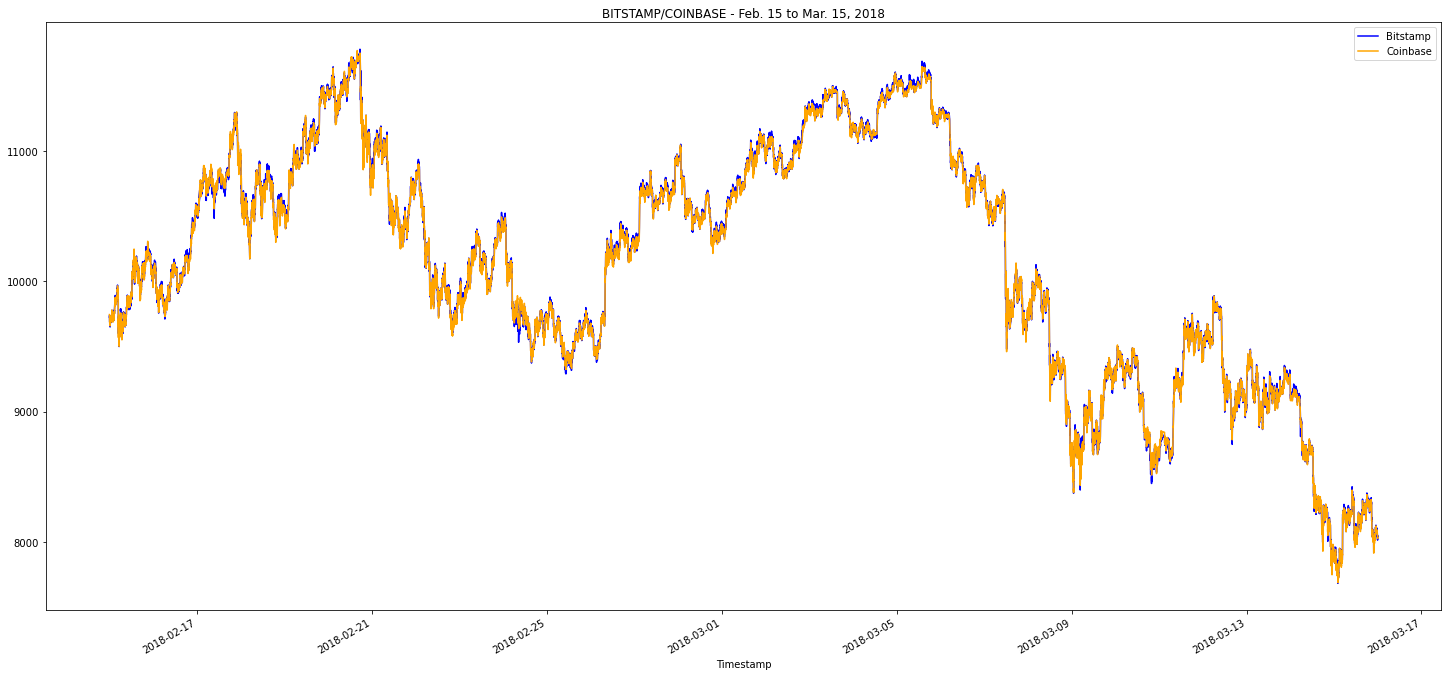

In [148]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-02-15':'2018-03-15'].plot(legend=True,figsize=(25,12),title='BITSTAMP/COINBASE - Feb. 15 to Mar. 15, 2018',color='blue',label='Bitstamp')
coinbase_sliced.loc['2018-02-15':'2018-03-15'].plot(legend=True,figsize=(25,12),color='orange',label='Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer**

The "_degree of spread change as time progressed_" is difficult to determine solely based upon the two selected portions of the full dataset.

For the first period of _2018-01-01 -- 2018-02-01_, the only notable change occurs immediately prior to the end of January heading into the beginning of February;

however, __based solely upon the visualizations, and not any actual mathematical metrics__ there also does not appear to be any noticeable change in the spread

throughout the second period of _2018-02-15 -- 2018-03-15_ even when in comparison to the first selected period, __either__.

Therefore, it would be innapropriate to pass any judgement of any substance without further analysis... in regards to __solely observing the visualizations__.


*__... further analysis__*, after analyzing and consulting the comparison of the basic '.describe()' statistics from each dataframe,

it becomes <u>more apparent</u> the story is the _lack_ of any <u>significant</u> change in the spread that is worth speaking of assuming there is not a significant amount of capital to justify any long-term and large scale implementation of this exchange differential as an arbitrage strategy.


### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'BITSTAMP/COINBASE - January 2nd, 2018'}, xlabel='Timestamp'>

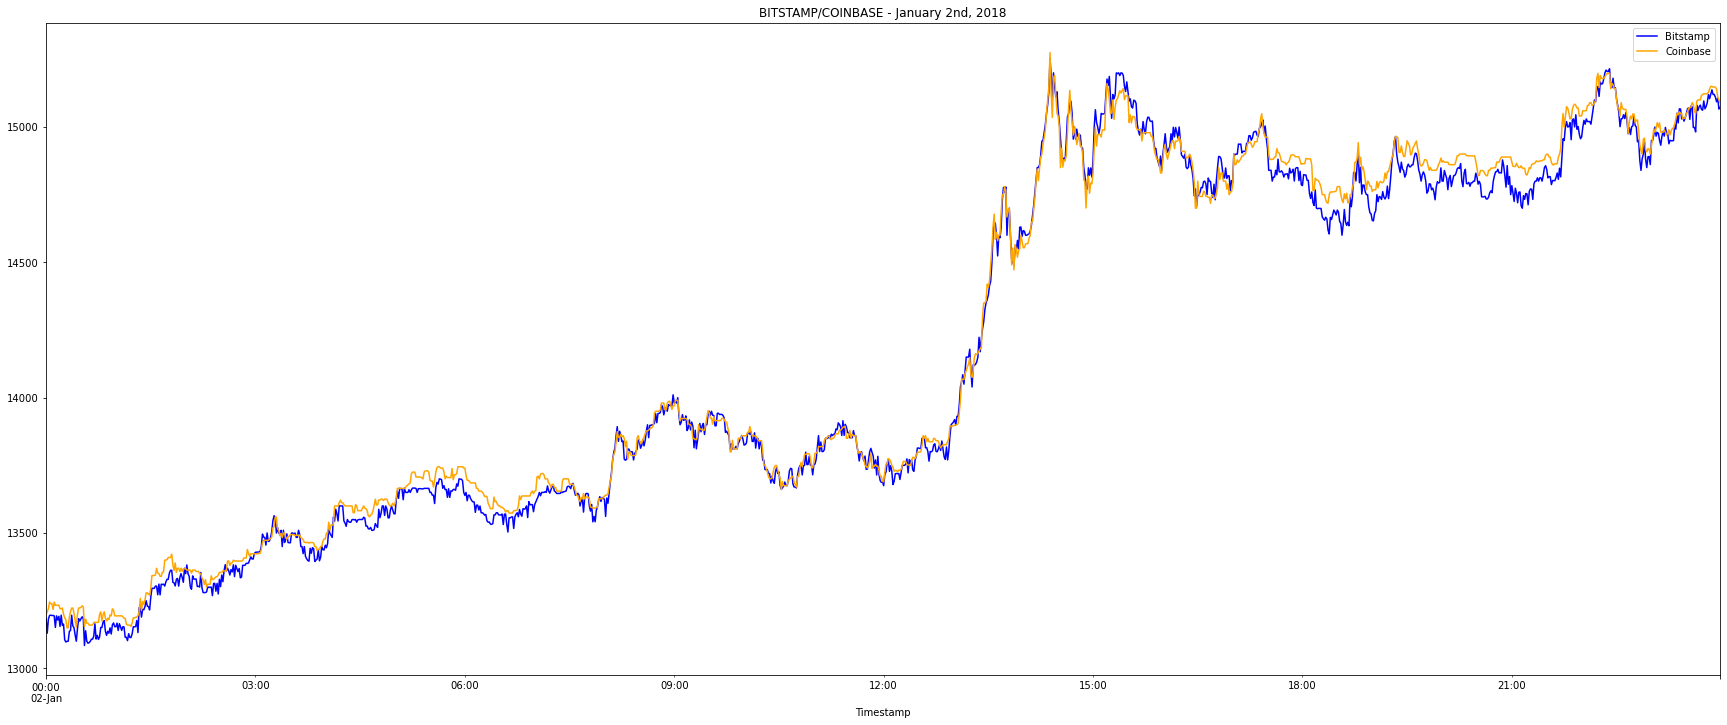

In [149]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-02'].plot(legend=True,figsize=(30,12),title='BITSTAMP/COINBASE - January 2nd, 2018',color='blue',label='Bitstamp')
coinbase_sliced.loc['2018-01-02'].plot(legend=True,figsize=(30,12),color='orange',label='Coinbase')

In [150]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-02'] - bitstamp_sliced.loc['2018-01-02']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       24.992396
std        40.490058
min      -110.880000
25%        -1.592500
50%        27.010000
75%        52.050000
max       148.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Spread: COINBASE <less> BITSTAMP for January 2nd, 2018'}>

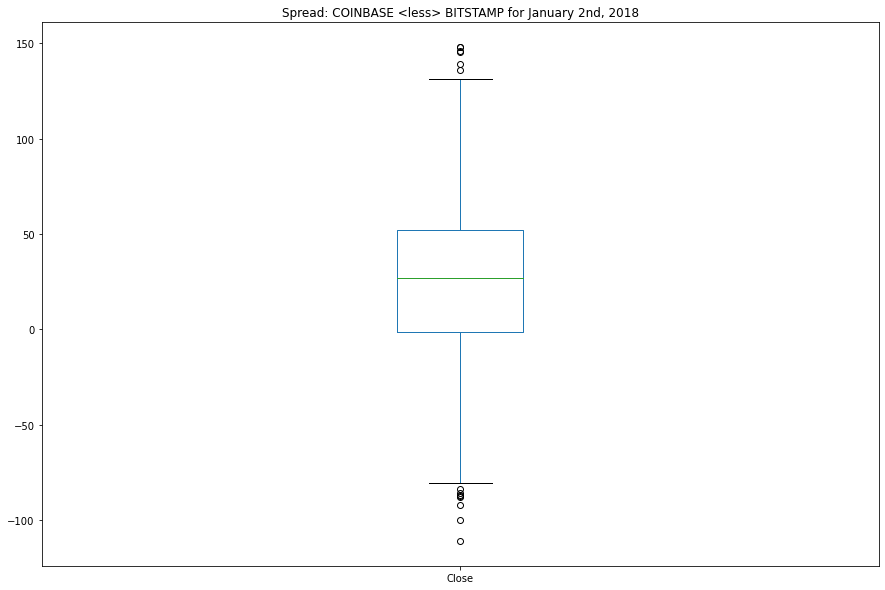

In [151]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(figsize=(15,10),title='Spread: COINBASE <less> BITSTAMP for January 2nd, 2018',kind='box')

<AxesSubplot:title={'center':'BITSTAMP/COINBASE - February 18th, 2018'}, xlabel='Timestamp'>

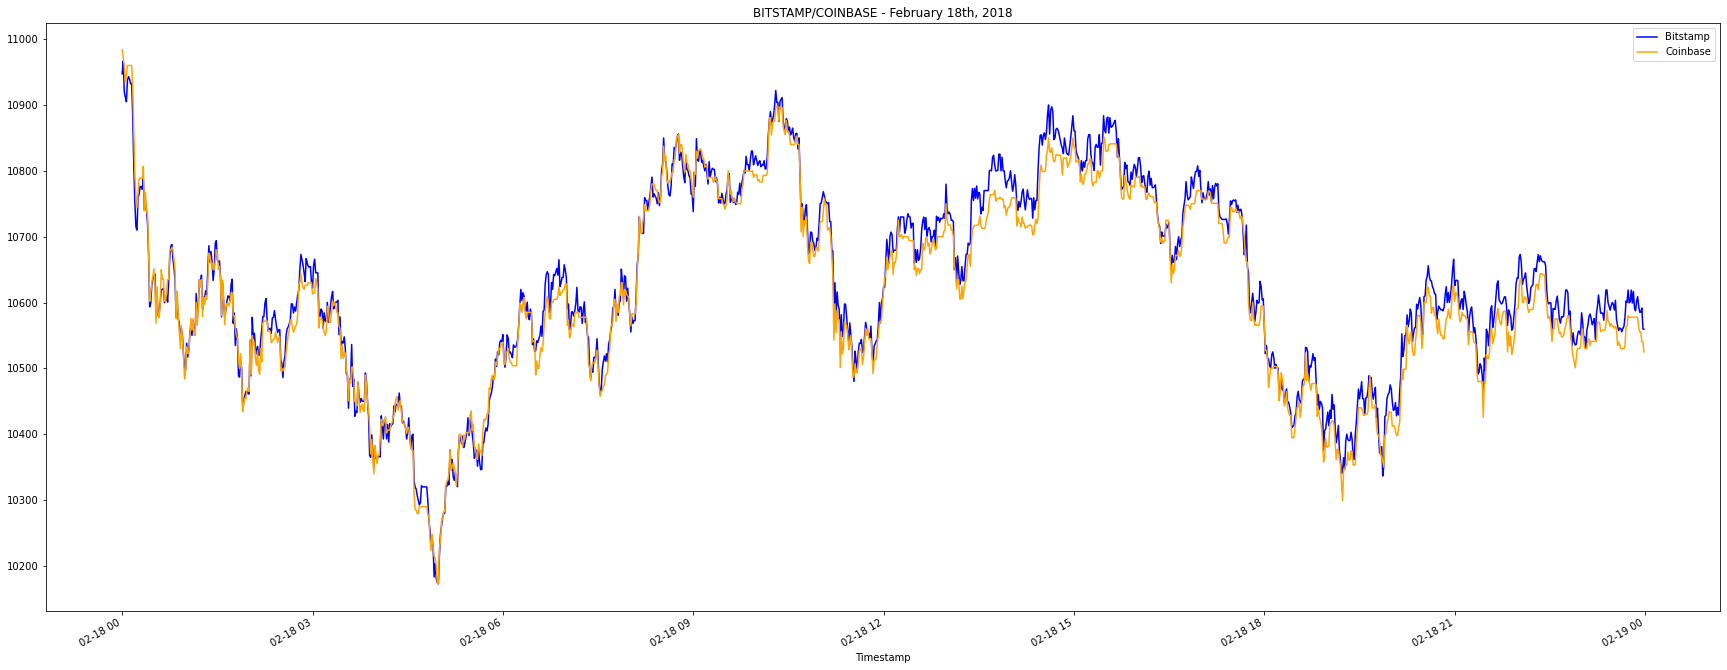

In [152]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-18'].plot(legend=True,figsize=(30,12),title='BITSTAMP/COINBASE - February 18th, 2018',color='blue',label='Bitstamp')
coinbase_sliced.loc['2018-02-18'].plot(legend=True,figsize=(30,12),color='orange',label='Coinbase')

In [153]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-18'] - bitstamp_sliced.loc['2018-02-18']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean      -15.861741
std        18.735501
min       -73.230000
25%       -29.277500
50%       -15.820000
75%        -3.182500
max        55.590000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Spread: COINBASE <less> BITSTAMP for February 18th, 2018'}>

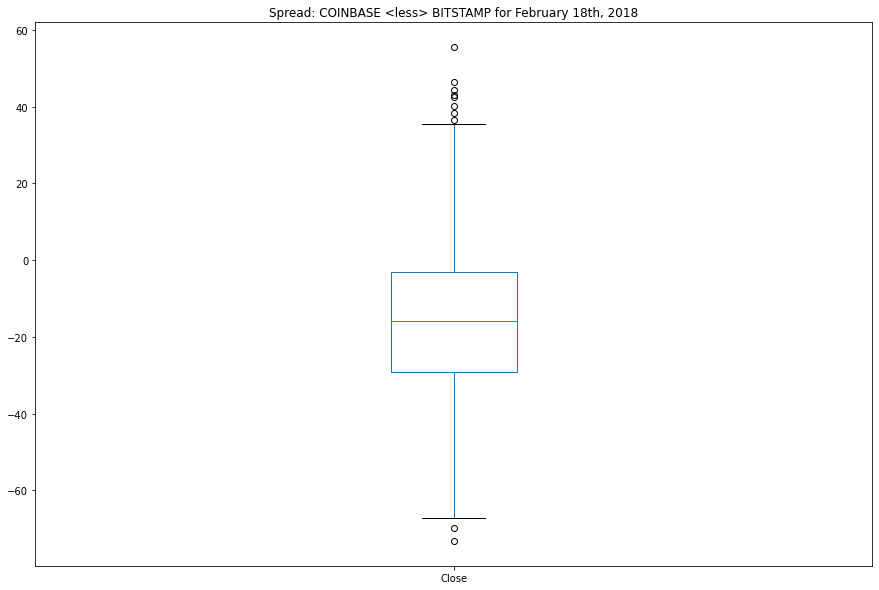

In [154]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(figsize=(15,10),title='Spread: COINBASE <less> BITSTAMP for February 18th, 2018',kind='box')

<AxesSubplot:title={'center':'BITSTAMP/COINBASE - March 30th, 2018'}, xlabel='Timestamp'>

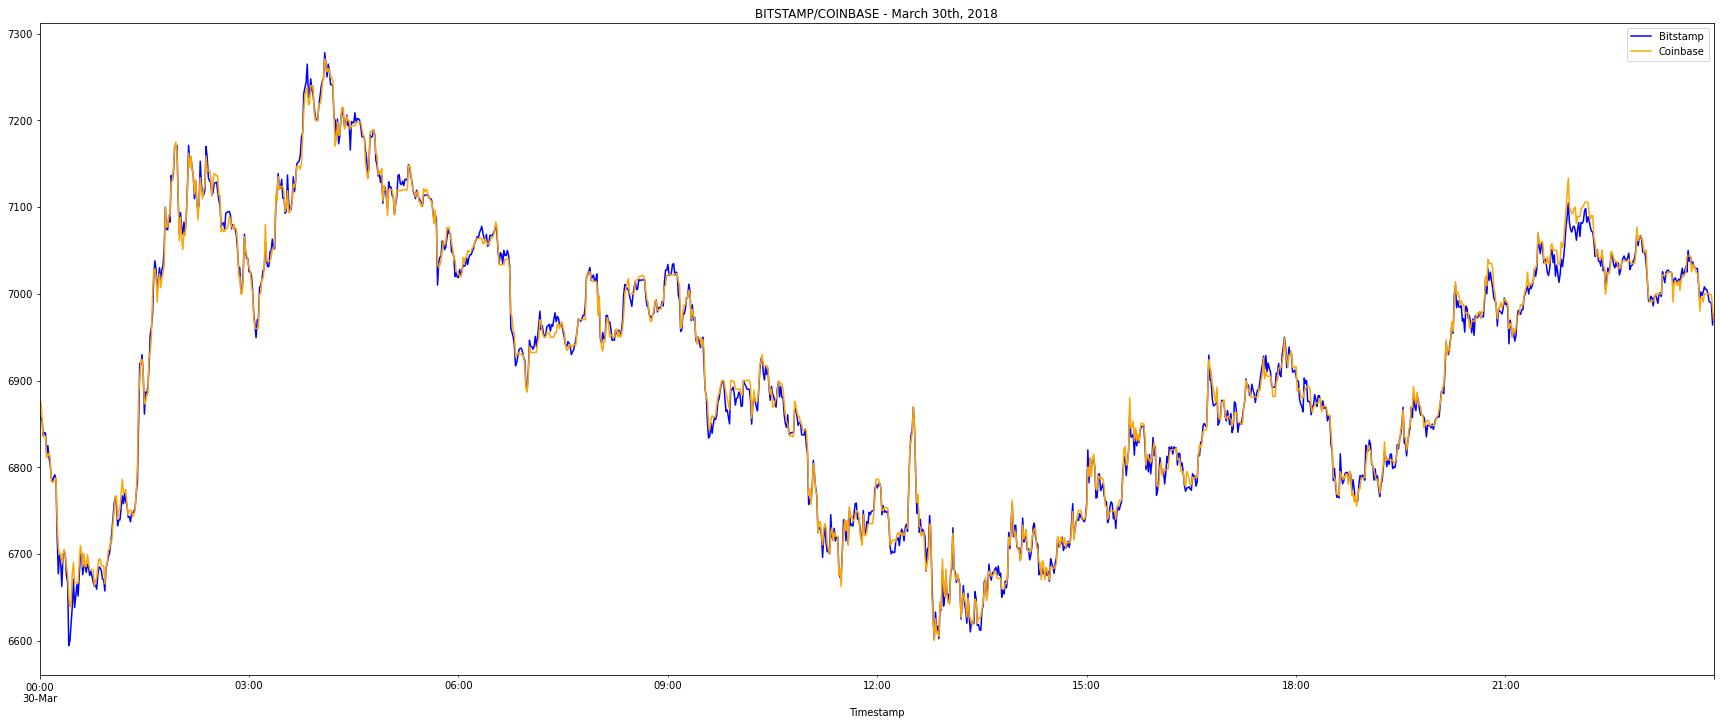

In [155]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-30'].plot(legend=True,figsize=(30,12),title='BITSTAMP/COINBASE - March 30th, 2018',color='blue',label='Bitstamp')
coinbase_sliced.loc['2018-03-30'].plot(legend=True,figsize=(30,12),color='orange',label='Coinbase')

In [156]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-03-30'] - bitstamp_sliced.loc['2018-03-30']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        1.419507
std         8.918465
min       -30.000000
25%        -4.412500
50%         1.205000
75%         6.640000
max        56.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Spread: COINBASE <less> BITSTAMP for March 30th, 2018'}>

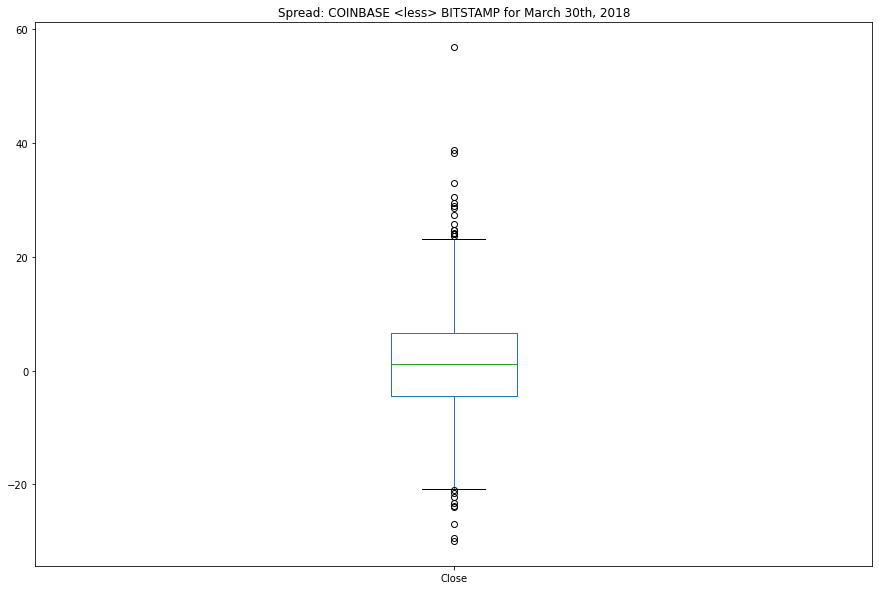

In [157]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(figsize=(15,10),title='Spread: COINBASE <less> BITSTAMP for March 30th, 2018',kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [192]:
# For each of the datasets, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

early_date      = '2018-01-04'
middle_date     = '2018-02-24'
late_date       = '2018-03-29'

arbitrage_spread_early      = coinbase_sliced.loc[early_date]   -   bitstamp_sliced.loc[early_date]
arbitrage_spread_middle     = coinbase_sliced.loc[middle_date]  -   bitstamp_sliced.loc[middle_date]
arbitrage_spread_late       = coinbase_sliced.loc[late_date]    -   bitstamp_sliced.loc[late_date]

In [159]:
# Use a conditional statement to generate the summary statistics for the early date's DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1024.000000
mean       52.519609
std        36.932341
min         0.010000
25%        24.825000
50%        46.505000
75%        71.810000
max       240.000000
Name: Close, dtype: float64

In [160]:
# Use a conditional statement to generate the summary statistics for the middle date's DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [161]:
# Use a conditional statement to generate the summary statistics for the late DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    500.000000
mean       7.567820
std        7.657764
min        0.010000
25%        2.617500
50%        5.535000
75%       10.542500
max       89.900000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [162]:
# For each date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early     = arbitrage_spread_early    [arbitrage_spread_early  > 0] / bitstamp_sliced.loc[early_date]
spread_return_middle    = arbitrage_spread_middle   [arbitrage_spread_middle > 0] / bitstamp_sliced.loc[middle_date]
spread_return_late      = arbitrage_spread_late     [arbitrage_spread_late   > 0] / bitstamp_sliced.loc[late_date]

# Review the spread return of each DataFrame
spread_return_early
spread_return_middle
spread_return_late


Timestamp
2018-03-29 00:00:00         NaN
2018-03-29 00:01:00         NaN
2018-03-29 00:02:00         NaN
2018-03-29 00:03:00         NaN
2018-03-29 00:04:00         NaN
                         ...   
2018-03-29 23:55:00    0.002500
2018-03-29 23:56:00    0.002277
2018-03-29 23:57:00    0.002660
2018-03-29 23:58:00    0.001873
2018-03-29 23:59:00    0.002815
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [163]:
# For each date in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_early     = spread_return_early   [spread_return_early    > .01]
profitable_trades_middle    = spread_return_middle  [spread_return_middle   > .01]
profitable_trades_late      = spread_return_late    [spread_return_late     > .01]

In [164]:
# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-04 01:59:00    0.010101
2018-01-04 02:10:00    0.011711
2018-01-04 02:12:00    0.011509
2018-01-04 02:15:00    0.011171
2018-01-04 02:19:00    0.013534
Name: Close, dtype: float64

In [165]:
# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [166]:
# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-29 17:11:00    0.012566
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [167]:
# Generate the summary statistics for the profitable trades
# or your trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    21.000000
mean      0.012226
std       0.002038
min       0.010004
25%       0.010639
50%       0.011509
75%       0.013534
max       0.016580
Name: Close, dtype: float64

In [168]:
# Generate the summary statistics for the profitable trades
# or your trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [169]:
# Generate the summary statistics for the profitable trades
# or your trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    1.000000
mean     0.012566
std           NaN
min      0.012566
25%      0.012566
50%      0.012566
75%      0.012566
max      0.012566
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [170]:
# Calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early    =   profitable_trades_early     *   bitstamp_sliced.loc[early_date]
profit_middle   =   profitable_trades_middle    *   bitstamp_sliced.loc[middle_date]
profit_late     =   profitable_trades_late      *   bitstamp_sliced.loc[late_date]

# Drop any missing values from the profit DataFrame
profit_per_trade_early      = profit_early  .dropna()
profit_per_trade_middle     = profit_middle .dropna()
profit_per_trade_late       = profit_late   .dropna()

In [171]:
# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-04 01:59:00    150.00
2018-01-04 02:10:00    173.45
2018-01-04 02:12:00    170.49
2018-01-04 02:15:00    165.00
2018-01-04 02:19:00    199.37
2018-01-04 02:20:00    157.16
2018-01-04 03:22:00    160.74
2018-01-04 03:23:00    146.74
2018-01-04 03:24:00    181.65
2018-01-04 03:25:00    204.83
2018-01-04 03:26:00    173.98
2018-01-04 03:27:00    200.11
2018-01-04 03:28:00    228.83
2018-01-04 03:29:00    240.00
2018-01-04 03:30:00    236.28
2018-01-04 03:31:00    182.98
2018-01-04 03:40:00    150.42
2018-01-04 03:41:00    156.00
2018-01-04 07:24:00    152.66
2018-01-04 07:25:00    152.67
2018-01-04 07:27:00    164.32
Name: Close, dtype: float64

In [172]:
# View the middle profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [173]:
# View the late profit DataFrame
profit_per_trade_late

Timestamp
2018-03-29 17:11:00    89.9
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [174]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     21.000000
mean     178.460952
std       29.150020
min      146.740000
25%      156.000000
50%      170.490000
75%      199.370000
max      240.000000
Name: Close, dtype: float64

In [175]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

In [176]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count     1.0
mean     89.9
std       NaN
min      89.9
25%      89.9
50%      89.9
75%      89.9
max      89.9
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade: January 4th, 2018 (21 Trades)'}, xlabel='Timestamp'>

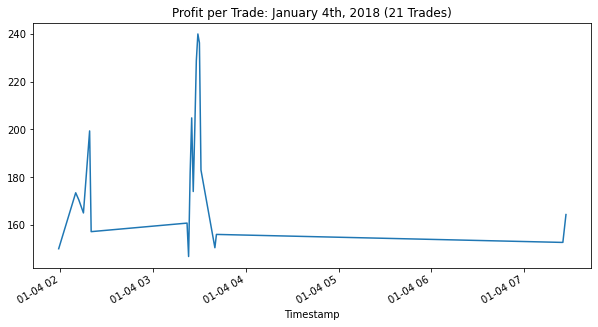

In [177]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,5),title='Profit per Trade: January 4th, 2018 (21 Trades)')

<AxesSubplot:title={'center':'Profit per trade: Feb. 24th, 2018 (3 trades)'}, xlabel='Timestamp'>

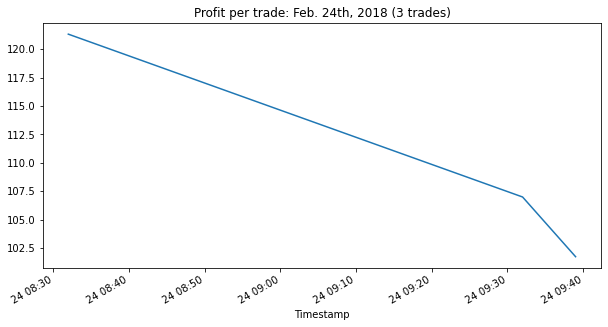

In [178]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10,5),title='Profit per trade: Feb. 24th, 2018 (3 trades)')

<AxesSubplot:title={'center':'Profit per Trade: March 29th, 2018 (1 Trade)'}, xlabel='Timestamp'>

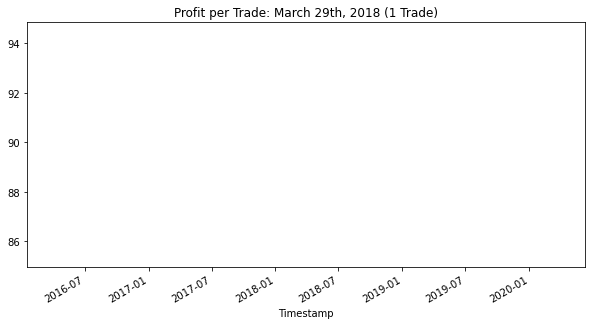

In [179]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10,5),title='Profit per Trade: March 29th, 2018 (1 Trade)')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [180]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

3747.680000000002

In [181]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()

330.0699999999997

In [182]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()

89.89999999999964

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [183]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early     =   profit_per_trade_early    .cumsum()
cumulative_profit_middle    =   profit_per_trade_middle   .cumsum()
cumulative_profit_late      =   profit_per_trade_late     .cumsum()

<AxesSubplot:title={'center':'Cumulative Profit Sum: January 4th, 2018'}, xlabel='Timestamp'>

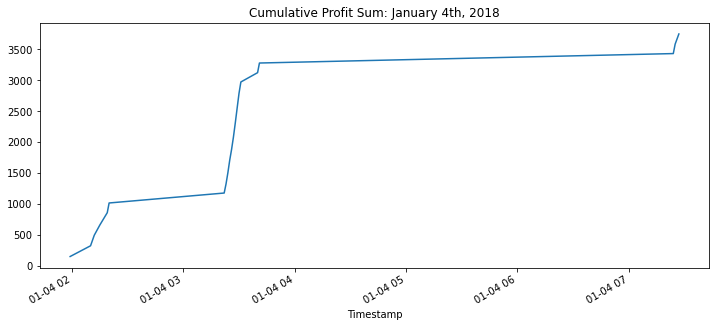

In [184]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(12,5),title='Cumulative Profit Sum: January 4th, 2018')

<AxesSubplot:title={'center':'Cumulative Profit Sum: February 24th, 2018'}, xlabel='Timestamp'>

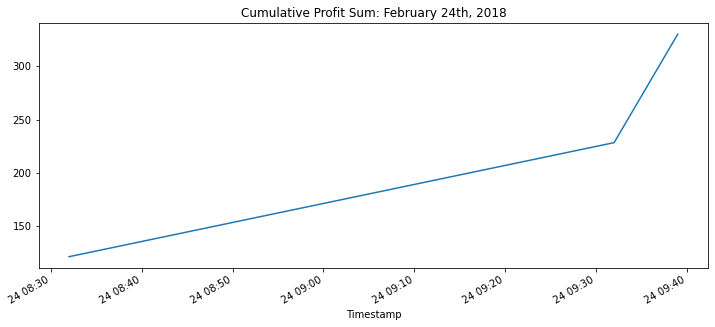

In [190]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(12,5),title='Cumulative Profit Sum: February 24th, 2018')

<AxesSubplot:title={'center':'Cumulative Profit Sum: March 29th, 2018 (1 Trade)'}, xlabel='Timestamp'>

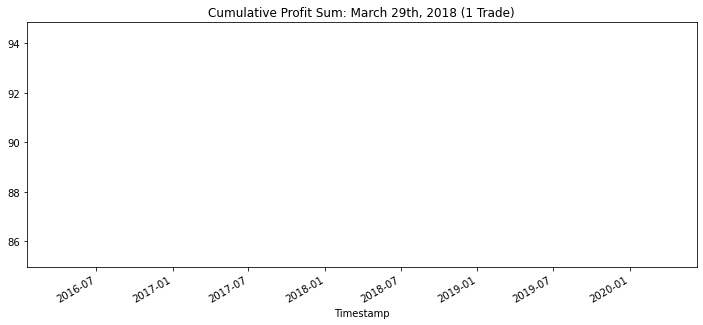

In [189]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(12,5),title='Cumulative Profit Sum: March 29th, 2018 (1 Trade)')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:**

After reviewing most of the slices of a single day within the dataset, it ultimately becomes evident the arbitrage window has closed between the prices on the Coinbase and Bitstamp exchanges.

This primary conclusion illustrated by the three isolated dates, January 4th, February 24th, & March 29th, is the trail off of the number of profitable trades exceeding minimum transaction costs throughout the full potential arbitrage period.

On January 4th, for the entire trading day across 1440 datapoints, a total of 21 potential trades matched our criteria for a cumulative profit of $3,474.68 which, while not a small amount of cash, depending upon the scale of the trading operation is quite likely not worth the time to develop and launch a trading algorithm given the next day with any profitable trades is the second date on February 24th; however, there were only three potentially profitable trades for the entire day crossing the breakeven point covering the 1% minimum transaction fee which would have totaled $330.07. This significant dropoff of $3,144.61 only continues more once the last date with any potentially profitable trades on March 29th is also taken into consideration. For March 29th, there was only one potentially profitable trade to the tune of $89.90.

In conclusion, I would not identify nor recommend adopting this as a viable trading strategy.